In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"           "time-range-image"

# **Ask**

#  **Business task**

The business task was to analyse smart device usage data in order to gain insights into how consumers use non-Bellabeat smart devices. Then selecting one Bellabeat product to apply these insights to in the presentation. The business questions are:

1. What are some trends in smart device usage?
 
2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat marketing   strategy?

## **Data Source**

This is a public data that explores smart device users’ daily habits.

***● FitBit Fitness Tracker Data***
click[Mobius](https://www.kaggle.com/arashnic) (CC0: Public Domain,
dataset made available through Mobius) contains personal fitness tracker
from thirty fitbit users. Thirty eligible Fitbit users consented to the
submission of personal tracker data, including minute-level output for
physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used
to explore users’ habits.

## **ROCCC analysis**

**Reliable:**low — the data collected from users without demographic
information

**Originality:** low — the data was collected from third-party Amazon
Mechanical Turk

**Comprehensive:** high — the data contained personal health data which
allowed me to answer business questions

**Current:** low — the respondents were generated during
04.12.2016–05.12.2016.

**Cited:** high — the data source was well-documented.

## **Stakeholders**

***Urška Sršen:***Bellabeat’s co-founder and Chief Creative Officer.

***Sando Mur:***Mathematician and Bellabeat’s co-founder.

***Bellabeat marketing analytics team.***

# **Prepare**

To start, let’s set up the environment by downloading and opening the
necessary libraries for the analysis.

## **Load Packages**

In [2]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lubridate)
library(readr)


## **Read**

Here we use Three Dataset from April 4.12.16 to May 5.12.16.

-   **Daily Activity**

In [3]:
data1 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

-   **Sleep Day**

In [4]:
data2 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

-   **Weight Log**

In [5]:
data3 <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# **Process**

## **Data Cleaning**


In [6]:
str(data1)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [7]:
##change variable type of ActivityDate "char" to "Date" format.
data1 <- data1 %>%
  distinct() %>%
  mutate(Date = lubridate::mdy(ActivityDate)) %>% 
  fill(everything(), .direction = "down") %>% 
select(-ActivityDate)


In [8]:
# Check for missing values
sum(is.na(data1))

[1] 0

In [9]:
# finding distinct and unique value
unique(data1$Id)
unique(data1$Date)

[1] 1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 [7] 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
[13] 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
[19] 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
[25] 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
[31] 8583815059 8792009665 8877689391

[1] "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16"
 [6] "2016-04-17" "2016-04-18" "2016-04-19" "2016-04-20" "2016-04-21"
[11] "2016-04-22" "2016-04-23" "2016-04-24" "2016-04-25" "2016-04-26"
[16] "2016-04-27" "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01"
[21] "2016-05-02" "2016-05-03" "2016-05-04" "2016-05-05" "2016-05-06"
[26] "2016-05-07" "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11"
[31] "2016-05-12"

In [10]:
# Sleepday data
str(data2)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [11]:
## Mutate and change variable type of ActivityDate "char" to "Date" format.
data2 <- data2 %>%
  distinct() %>%
  mutate(Date = lubridate::mdy_hms(SleepDay)) %>% 
  fill(everything(), .direction = "down") %>% 
select(-SleepDay)
glimpse(data2)

Rows: 410
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ Date               <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…


In [12]:
# Check for missing values
sum(is.na(data2))

[1] 0

In [13]:
unique(data2$Id)
unique(data2$Date)

[1] 1503960366 1644430081 1844505072 1927972279 2026352035 2320127002
 [7] 2347167796 3977333714 4020332650 4319703577 4388161847 4445114986
[13] 4558609924 4702921684 5553957443 5577150313 6117666160 6775888955
[19] 6962181067 7007744171 7086361926 8053475328 8378563200 8792009665

 [1] "2016-04-12 UTC" "2016-04-13 UTC" "2016-04-15 UTC" "2016-04-16 UTC"
 [5] "2016-04-17 UTC" "2016-04-19 UTC" "2016-04-20 UTC" "2016-04-21 UTC"
 [9] "2016-04-23 UTC" "2016-04-24 UTC" "2016-04-25 UTC" "2016-04-26 UTC"
[13] "2016-04-28 UTC" "2016-04-29 UTC" "2016-04-30 UTC" "2016-05-01 UTC"
[17] "2016-05-02 UTC" "2016-05-03 UTC" "2016-05-05 UTC" "2016-05-06 UTC"
[21] "2016-05-07 UTC" "2016-05-08 UTC" "2016-05-09 UTC" "2016-05-10 UTC"
[25] "2016-05-11 UTC" "2016-04-14 UTC" "2016-04-22 UTC" "2016-04-27 UTC"
[29] "2016-05-04 UTC" "2016-05-12 UTC" "2016-04-18 UTC"

In [14]:
#Weightlog Data
str(data3)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


In [15]:
#check for missing value
sum(is.na(data3))

[1] 65

There are 65 missing values in weight log data

In [16]:
# change Date variable from "char" to "Date" format
data3$datetime <- mdy_hms(data3$Date)

In [17]:
# selecting and removing the needed col
data3 <- data3 %>% 
select(-Fat,-Date,-LogId,-WeightPounds,-IsManualReport)
glimpse(data3)

Rows: 67
Columns: 4
$ Id       <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212765, 4…
$ WeightKg <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, 69.9, …
$ BMI      <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25, 27.46…
$ datetime <dttm> 2016-05-02 23:59:59, 2016-05-03 23:59:59, 2016-04-13 01:08:5…


In [18]:
# mutate seperate Date and Time col 
data3$Date <- as.Date(data3$datetime) 
data3$Time <- format(data3$datetime, "%H:%M:%S")

glimpse(data3)

Rows: 67
Columns: 6
$ Id       <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212765, 4…
$ WeightKg <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, 69.9, …
$ BMI      <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25, 27.46…
$ datetime <dttm> 2016-05-02 23:59:59, 2016-05-03 23:59:59, 2016-04-13 01:08:5…
$ Date     <date> 2016-05-02, 2016-05-03, 2016-04-13, 2016-04-21, 2016-05-12, …
$ Time     <chr> "23:59:59", "23:59:59", "01:08:52", "23:59:59", "23:59:59", "…


In [19]:
# remove the Datetime col
data3 <- data3 %>% 
  arrange( Date) %>% 
  select(- datetime)

glimpse(data3)

Rows: 67
Columns: 5
$ Id       <dbl> 6962181067, 8877689391, 1927972279, 6962181067, 8877689391, 6…
$ WeightKg <dbl> 62.5, 85.8, 133.5, 62.1, 84.9, 61.7, 84.5, 61.5, 62.0, 85.5, …
$ BMI      <dbl> 24.39, 25.68, 47.54, 24.24, 25.41, 24.10, 25.31, 24.00, 24.21…
$ Date     <date> 2016-04-12, 2016-04-12, 2016-04-13, 2016-04-13, 2016-04-13, …
$ Time     <chr> "23:59:59", "06:47:11", "01:08:52", "23:59:59", "06:55:00", "…


In [20]:
#again check for missing value
sum(is.na(data3))

[1] 0

In [21]:
unique(data3$Id)
unique(data3$Date)

[1] 6962181067 8877689391 1927972279 4319703577 5577150313 4558609924 2873212765
[8] 1503960366

[1] "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16"
 [6] "2016-04-17" "2016-04-18" "2016-04-19" "2016-04-20" "2016-04-21"
[11] "2016-04-22" "2016-04-23" "2016-04-24" "2016-04-25" "2016-04-26"
[16] "2016-04-27" "2016-04-28" "2016-04-29" "2016-04-30" "2016-05-01"
[21] "2016-05-02" "2016-05-03" "2016-05-04" "2016-05-05" "2016-05-06"
[26] "2016-05-07" "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11"
[31] "2016-05-12"

Total 8 Id weight log data dated from 12.4.2016 to 12.5.2016

# **Analyze**

-   **Merging the Dataset**

In [22]:
# merging all the three dataset together
final_df <- merge(merge(data1, data2,by = c('Id', 'Date'), all = TRUE), data3,by = c('Id', 'Date'), all = TRUE)

In [23]:
head(final_df)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,BMI,Time
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,1,327,346,NA,NA,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,19,217,776,1797,2,384,407,NA,NA,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,11,181,1218,1776,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,34,209,726,1745,1,412,442,NA,NA,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,10,221,773,1863,2,340,367,NA,NA,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,20,164,539,1728,1,700,712,NA,NA,NA


In [24]:
summary(final_df)

       Id                 Date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
                                                                          
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.

-   **Summarize The Data**

In [25]:
# create daily activity summary
bella_daily <- final_df %>%   
  select(Id,Date,TrackerDistance,TotalSteps,Calories) %>% 
  filter(complete.cases(.))   ##eliminating na from the dataset
glimpse(bella_daily)

Rows: 940
Columns: 5
$ Id              <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396…
$ Date            <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15, 2016-…
$ TrackerDistance <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88, 6.68, …
$ TotalSteps      <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, …
$ Calories        <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, …


In [26]:
bella_daily <- bella_daily %>%
   distinct(Id,Date, .keep_all = TRUE) %>% 
   group_by(Id,Date) %>%
   summarize(Total_Distance = sum(TrackerDistance),
   Total_Steps =sum(TotalSteps),
   Total_calories= sum(Calories)) %>%
   ungroup()

  glimpse(bella_daily)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 940
Columns: 5
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ Date           <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15, 2016-0…
$ Total_Distance <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.88, 6.68, 6…
$ Total_Steps    <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 1…
$ Total_calories <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1…


In [27]:
# Mutate Week col
bella_daily<- bella_daily %>% 
  mutate(Week = weekdays(Date))

In [28]:
bella_daily_week <- bella_daily%>%
  distinct(Id,Date, .keep_all = TRUE) %>% 
  group_by(Id,Week) %>%
  summarize( average_calories= mean(Total_calories),
            average_steps = mean (Total_Steps),
            average_distance= mean(Total_Distance)) %>%
  ungroup()
glimpse(bella_daily_week)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 228
Columns: 5
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ Week             <chr> "Friday", "Monday", "Saturday", "Sunday", "Thursday",…
$ average_calories <dbl> 1826.25, 1939.25, 1895.00, 1769.00, 1481.60, 1967.80,…
$ average_steps    <dbl> 11466.50, 13780.75, 13426.25, 10101.50, 9500.60, 1394…
$ average_distance <dbl> 7.3975, 8.9550, 8.5400, 6.5700, 6.1020, 8.9200, 8.228…


-   **Check the sedentary minutes and most active and less active
    minutes**

In [29]:
bella_data_sed <-final_df%>% 
  select(Id,Date,Calories,ends_with("Minutes")) %>% 
  mutate(total_minutes = rowSums(across(ends_with("Minutes"))),
    total_hours = total_minutes %/% 60,
    total_remaining_minutes = total_minutes %% 60)

glimpse(bella_data_sed)

Rows: 940
Columns: 10
$ Id                      <dbl> 1503960366, 1503960366, 1503960366, 1503960366…
$ Date                    <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-1…
$ Calories                <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035…
$ VeryActiveMinutes       <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41…
$ FairlyActiveMinutes     <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21,…
$ LightlyActiveMinutes    <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, 2…
$ SedentaryMinutes        <int> 728, 776, 1218, 726, 773, 539, 1149, 775, 818,…
$ total_minutes           <dbl> 1094, 1033, 1440, 998, 1040, 761, 1440, 1120, …
$ total_hours             <dbl> 18, 17, 24, 16, 17, 12, 24, 18, 17, 17, 24, 17…
$ total_remaining_minutes <dbl> 14, 13, 0, 38, 20, 41, 0, 40, 43, 56, 0, 36, 3…


In [30]:
bella_daily_sed<- bella_data_sed%>% 
  mutate(Week = weekdays(Date))
glimpse(bella_daily_sed)

Rows: 940
Columns: 11
$ Id                      <dbl> 1503960366, 1503960366, 1503960366, 1503960366…
$ Date                    <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-1…
$ Calories                <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035…
$ VeryActiveMinutes       <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41…
$ FairlyActiveMinutes     <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21,…
$ LightlyActiveMinutes    <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, 2…
$ SedentaryMinutes        <int> 728, 776, 1218, 726, 773, 539, 1149, 775, 818,…
$ total_minutes           <dbl> 1094, 1033, 1440, 998, 1040, 761, 1440, 1120, …
$ total_hours             <dbl> 18, 17, 24, 16, 17, 12, 24, 18, 17, 17, 24, 17…
$ total_remaining_minutes <dbl> 14, 13, 0, 38, 20, 41, 0, 40, 43, 56, 0, 36, 3…
$ Week                    <chr> "Tuesday", "Wednesday", "Thursday", "Friday", …


-   **Identify the sleep Quality**

In [31]:
DailySleep_quality <-  final_df %>% 
  select(Id,Date,TotalMinutesAsleep) %>% 
  drop_na() %>% 
  mutate(Week = weekdays(Date)) %>% 
  mutate(sleep_quality = ifelse(TotalMinutesAsleep <= 420, 'Less than 7h',
                         ifelse(TotalMinutesAsleep <= 540, '7h to 9h', 
                         'More than 9h'))) %>%
  mutate(sleep_quality = factor(sleep_quality, 
                          levels = c('Less than 7h','7h to 9h',
                                     'More than 9h'))) %>% 
ungroup()

glimpse(DailySleep_quality)

Rows: 410
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ Date               <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ Week               <chr> "Tuesday", "Wednesday", "Friday", "Saturday", "Sund…
$ sleep_quality      <fct> Less than 7h, Less than 7h, Less than 7h, Less than…


In [32]:
Avrg_sleep <- final_df %>% 
  select(Id,Date,TotalDistance,TotalMinutesAsleep,TotalTimeInBed) %>% 
  drop_na() %>% 
  group_by(Id,Date) %>% 
  mutate(Week = weekdays(Date)) %>% 
  summarise(Average_distance = mean(TotalDistance),Average_sleep = mean(TotalMinutesAsleep))%>% 
  
  ungroup()

glimpse(Avrg_sleep)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 410
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ Date             <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 2016…
$ Average_distance <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.34, 9.04,…
$ Average_sleep    <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 277…


In [33]:
weight_data <- final_df %>% 
  select(Id,Date,WeightKg,TotalSteps) %>% 
  drop_na() %>% 
  group_by(Id,Date) %>% 
  summarise(Average_weight = mean(WeightKg),Average_Steps = mean(TotalSteps)) %>% 
  ungroup()

glimpse(weight_data)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 67
Columns: 4
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <date> 2016-05-02, 2016-05-03, 2016-04-13, 2016-04-21, 2016-0…
$ Average_weight <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ Average_Steps  <dbl> 14727, 15103, 356, 8859, 7566, 29, 10429, 8940, 8095, 3…


# **Share**
​
**5.1Daily Activity of Users \| Total Calories Vs Total Steps
Relationship**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


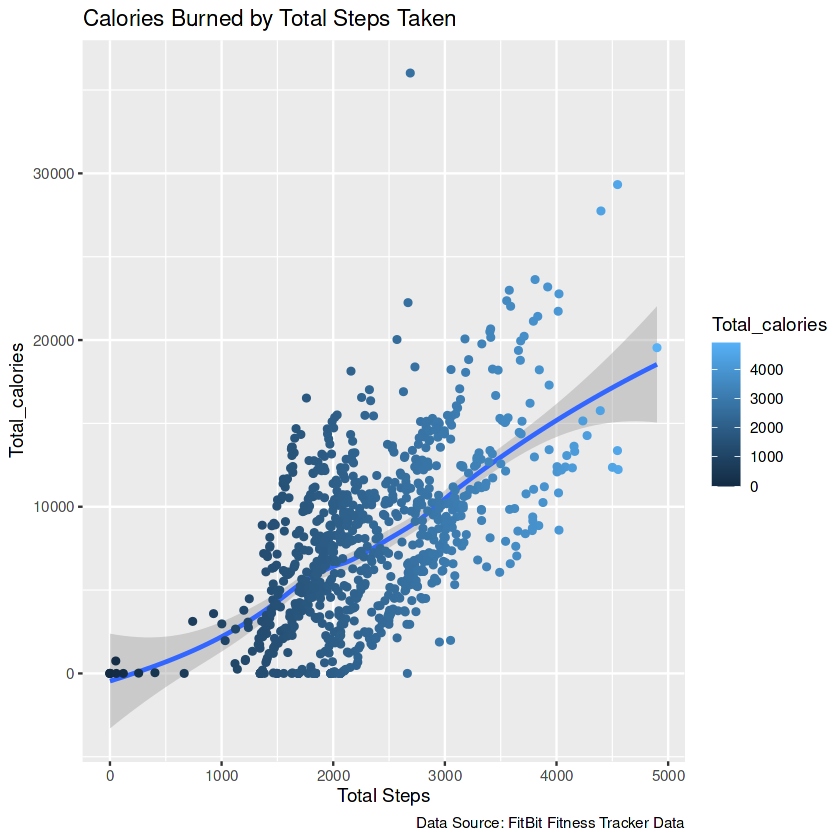

In [34]:
ggplot(data = bella_daily )+
geom_smooth(mapping = aes(x = Total_calories, y = Total_Steps))+
geom_point(mapping = aes(x = Total_calories, y = Total_Steps,color = Total_calories))+
labs(title = 'Calories Burned by Total Steps Taken',
       y = 'Total_calories',
       x = 'Total Steps',
       caption = 'Data Source: FitBit Fitness Tracker Data')

correlation test is used to determine how strongly pairs of
variables are related.

**Pearson correlation:** Measures linear relationship between two
continuous variables

In [35]:
correlation_result <- cor( bella_daily$Total_calories, bella_daily$Total_Steps)

print(correlation_result)

[1] 0.5915681


This value indicates the strength and direction of the linear
relationship between **Total Steps** and **Calories**. A value of
**0.5929493** suggests a moderate positive correlation, meaning that as
the number of steps increases, the number of calories burned tends to
increase as well


**5.2 Weekly analysis of Daily Activity**

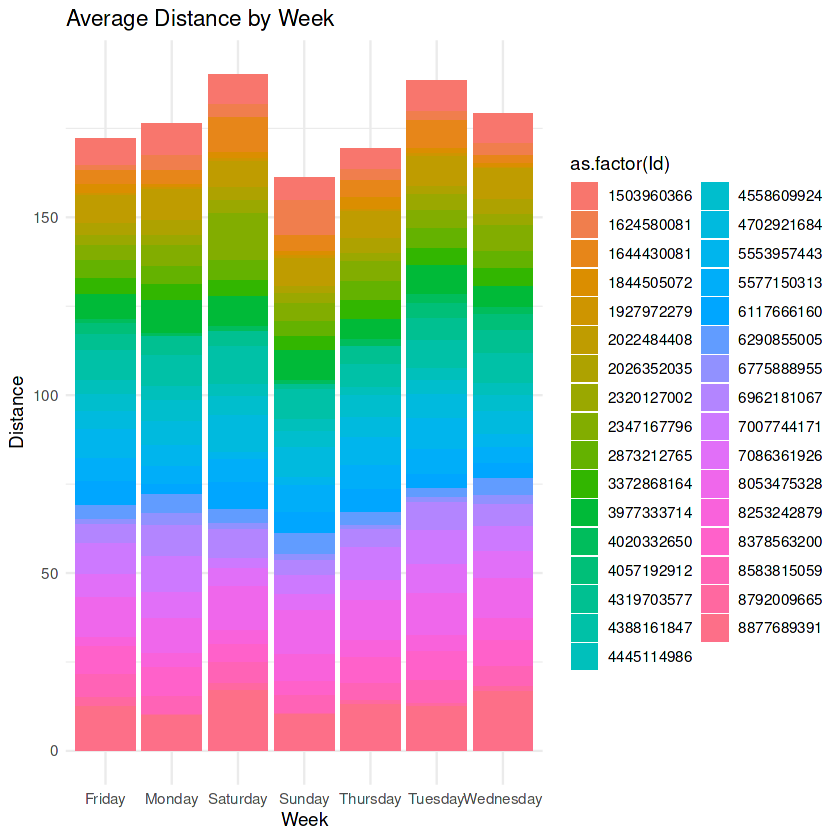

In [36]:
##Weekly analysis of daily activity

ggplot(bella_daily_week, aes(x = Week , y = average_distance , fill = as.factor(Id))) +
  geom_bar(stat = "summary", fun = "sum") +
  labs(title = "Average Distance by Week", x = "Week", y = "Distance") +
  theme_minimal()

Users are more active and have move more distance on Saturdays.

**5.3 Identifying Daily Active Minutes Distribution**

In [37]:
Sed <- final_df %>% 
select(VeryActiveMinutes, 
             FairlyActiveMinutes, 
             LightlyActiveMinutes, 
              SedentaryMinutes) %>% 
  summarise(across(everything(), list(sum))) %>% 
  gather(active_level, minutes) %>% 
   mutate(active_level = factor(active_level,labels = c('Moderate Activity','Light Activity', 'Sedentary','Heavy Activity')),
             percentage = round(minutes /sum(minutes) * 100, 1)) %>% 
  ungroup()
glimpse(Sed)


Rows: 4
Columns: 3
$ active_level <fct> Heavy Activity, Moderate Activity, Light Activity, Sedent…
$ minutes      <int> 19895, 12751, 181244, 931738
$ percentage   <dbl> 1.7, 1.1, 15.8, 81.3


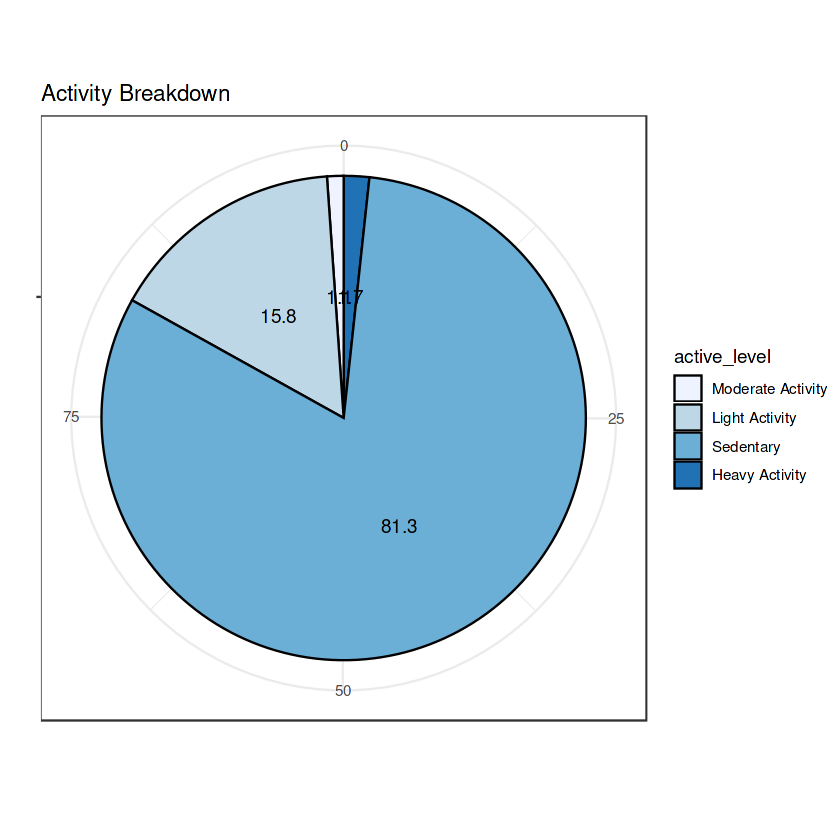

In [38]:
ggplot(Sed,mapping = aes(x = "", y = percentage, fill = active_level)) + 
    geom_col(color = "black") +
    geom_text(aes(label = percentage),
              position = position_stack(vjust = 0.5)) +
 labs(title = "Activity Breakdown", x = "", y = "")+
    coord_polar(theta = "y") +
    scale_fill_brewer() +
    theme_bw()


In the above plot we see the users 81.3% Sedentary and are less
active.They are mostly lighty active compared to very
active minutes.

**5.4 Finding Patterns on their Active Minutes**

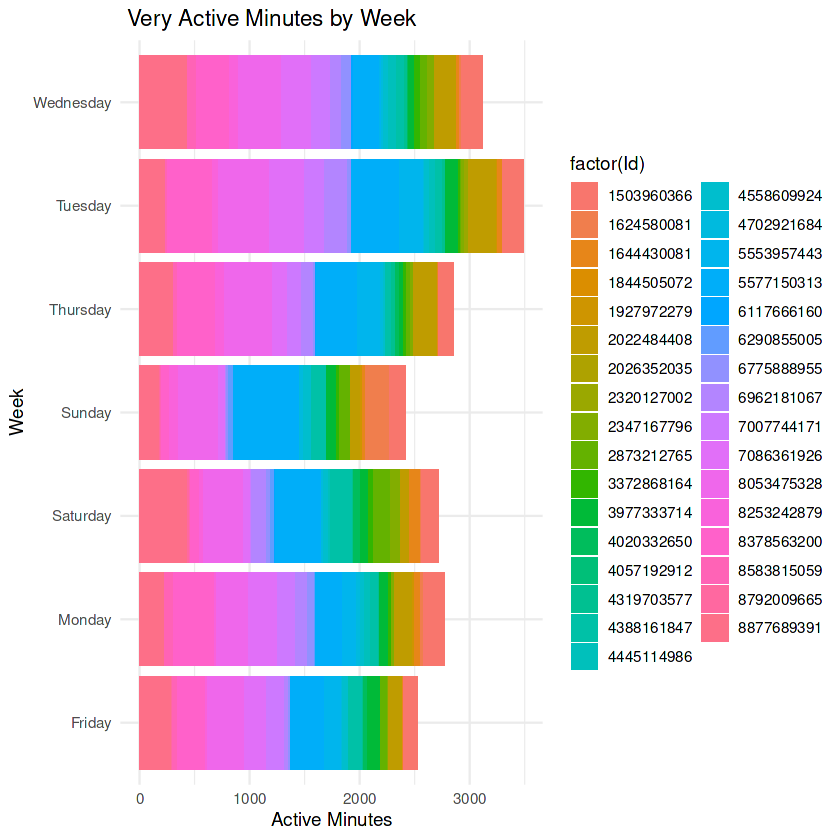

In [39]:
ggplot(bella_daily_sed, aes(x =VeryActiveMinutes , y = Week ,fill = factor(Id))) +
  geom_bar(stat = "summary", fun = "sum") +
  labs(title = " Very Active Minutes by Week", x = "Active Minutes", y = "Week") +
  theme_minimal()

Most of the users are active on the weekdays.

In [40]:
Time_range <- final_df %>% 
  select(Id,Time,TotalSteps,Calories) %>% 
  group_by(Id,Time) %>% 
  drop_na() %>% 
  summarise(Avg_step = mean(TotalSteps),Avg_Calories = mean(Calories)) %>% 
  ungroup()
glimpse(Time_range)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 30
Columns: 4
$ Id           <dbl> 1503960366, 1927972279, 2873212765, 4319703577, 455860992…
$ Time         <chr> "23:59:59", "01:08:52", "23:59:59", "23:59:59", "23:59:59…
$ Avg_step     <dbl> 14915.000, 356.000, 8212.500, 5229.000, 7961.000, 12231.0…
$ Avg_Calories <dbl> 1997.000, 2151.000, 1700.500, 1873.000, 2064.400, 4552.00…


List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

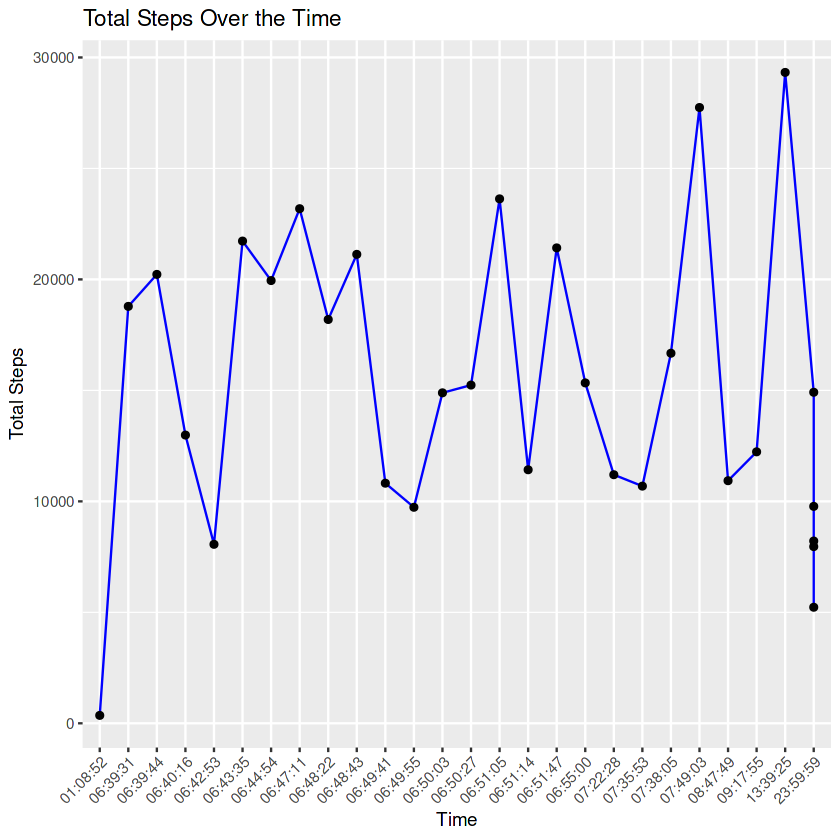

In [41]:
##Comparing Time with daily activity

ggplot(Time_range, aes(x = Time, y = Avg_step, group = 1)) +
  geom_line(color = "blue") +
  geom_point() +
  labs(title = "Total Steps Over the Time",
       x = "Time",
       y = "Total Steps")+theme(axis.text.x = element_text(angle = 45, hjust = 1))
  theme_minimal()

List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

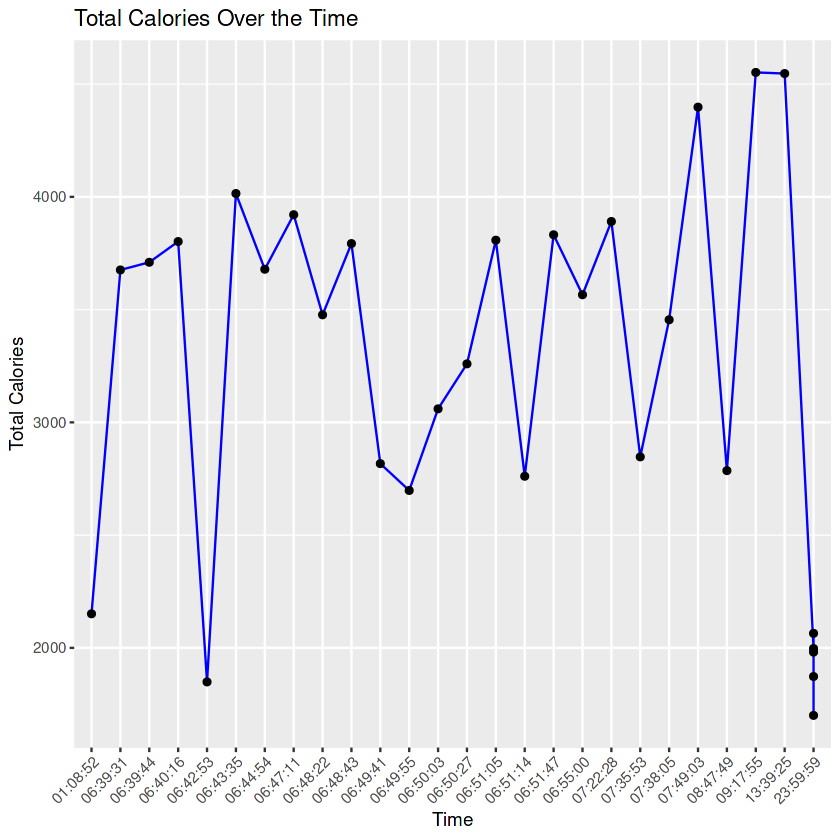

In [42]:
ggplot(Time_range, aes(x = Time, y = Avg_Calories, group = 1)) +
  geom_line(color = "blue") +
  geom_point() +
  labs(title = "Total Calories Over the Time",
       x = "Time",
       y = "Total Calories")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
  theme_minimal()

the above plot gives the relationship of time range with steps and
calories. we see the users are more active on first half of the day
starting from 6AM to 13 PM and later there is a decrease in the burned
calories and steps taken. So ,they are mostly active during first half
of a Day.

**5.5 Checking Sleep Quality Of Users**

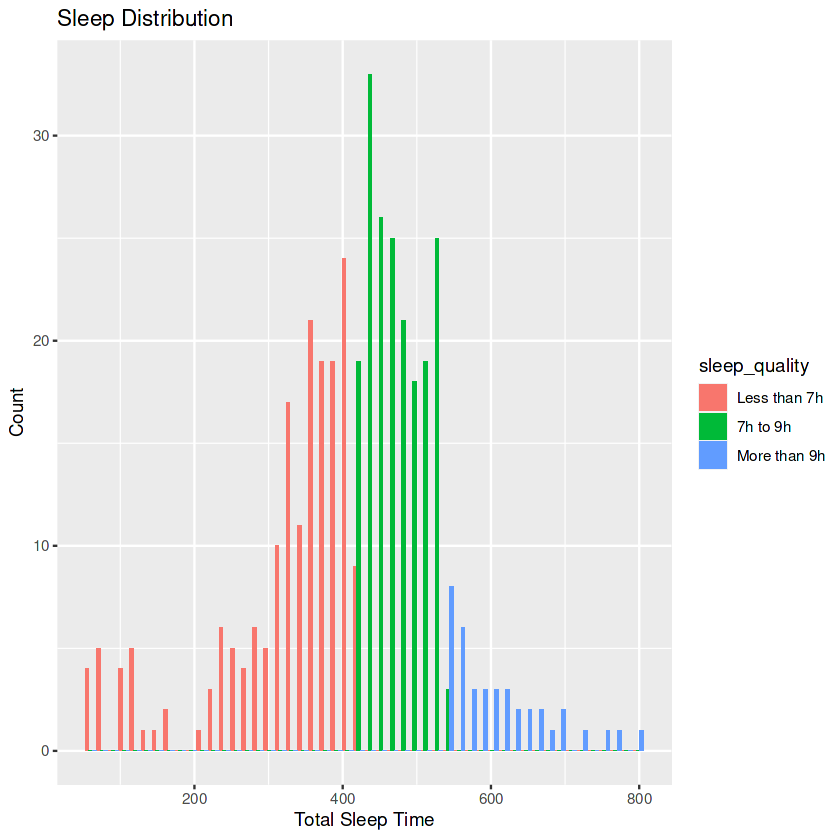

In [43]:
## Total minutes of sleep and their quality 

ggplot(DailySleep_quality,aes(x = TotalMinutesAsleep, fill = sleep_quality)) +
  geom_histogram(position = 'dodge', bins = 50) + labs(title = "Sleep Distribution",
    x = "Total Sleep Time",
    y = "Count")

In [44]:
## Analysing the sleep quality by comparing their activity 
sleep_check <- final_df %>% 
  select(Id,Date,TotalSteps,TotalMinutesAsleep,TotalTimeInBed) %>% 
    mutate(Week = weekdays(Date),
           No_sleep = TotalTimeInBed-TotalMinutesAsleep)%>% 
  drop_na() %>% 
  group_by(Id,Week) %>% 
  summarise(Avg_Steps = mean(TotalSteps),Avg_Sleep = mean(TotalMinutesAsleep),Avg_Inbed = mean(TotalTimeInBed),No_sleep = mean(No_sleep)) %>% 
  ungroup()
glimpse(sleep_check)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Rows: 134
Columns: 6
$ Id        <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, …
$ Week      <chr> "Friday", "Monday", "Saturday", "Sunday", "Thursday", "Tuesd…
$ Avg_Steps <dbl> 11034.000, 14034.667, 13426.250, 10101.500, 12347.667, 13946…
$ Avg_Sleep <dbl> 362.3333, 297.3333, 359.0000, 523.2500, 312.6667, 306.4000, …
$ Avg_Inbed <dbl> 387.6667, 324.6667, 381.2500, 542.0000, 340.3333, 327.8000, …
$ No_sleep  <dbl> 25.33333, 27.33333, 22.25000, 18.75000, 27.66667, 21.40000, …


**Weekly Sleep Distribution**

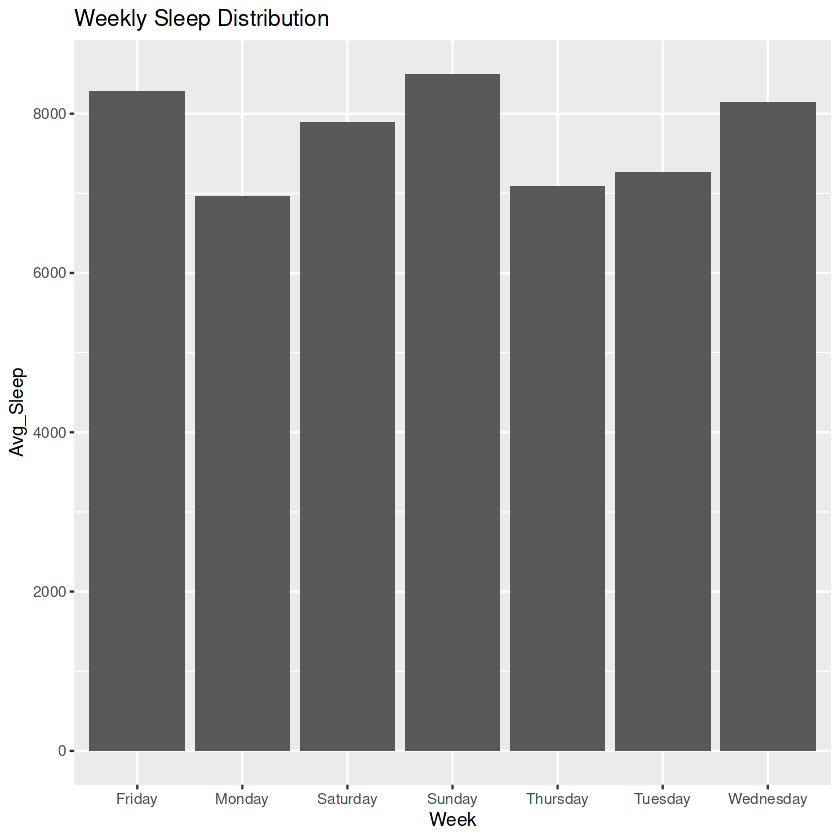

In [45]:
ggplot(sleep_check, aes(x = Week , y =Avg_Sleep))+
  geom_bar(stat = "summary", fun = "sum")+
  labs(
    title = "Weekly Sleep Distribution",
    x = "Week"
  )

**Weekly analysis of Average Time on bed**

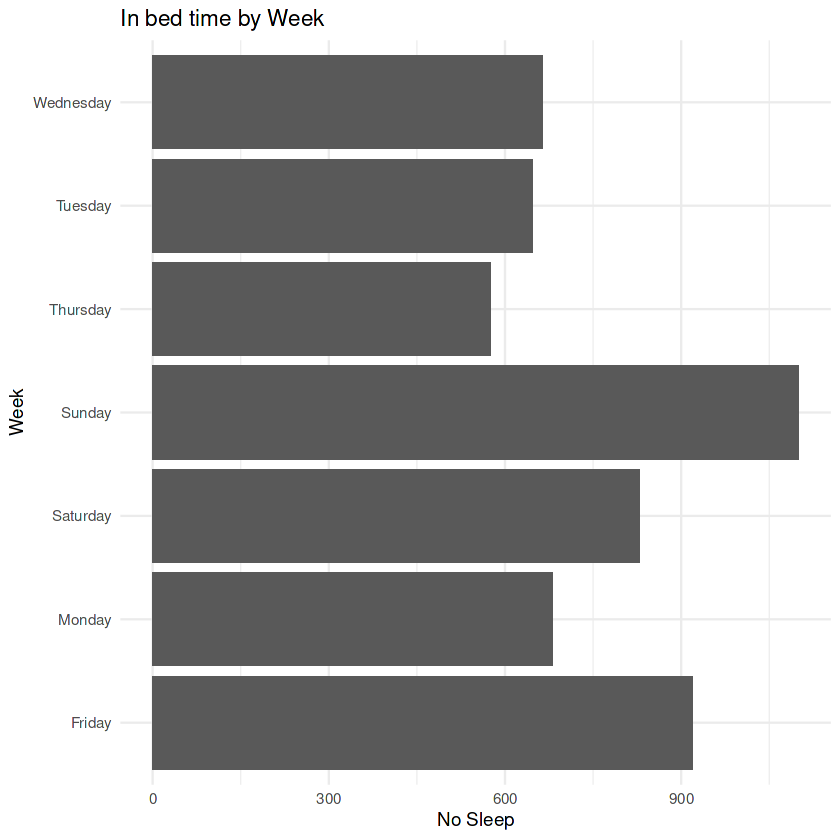

In [46]:
ggplot(sleep_check, aes(x = No_sleep, y = Week)) +
  geom_bar(stat = "summary", fun = "sum") +
  labs(title = "In bed time by Week", x = "No Sleep", y = "Week") +
  theme_minimal()

Warning message:
“Removed 327 rows containing missing values (`geom_bar()`).”


$x
[1] "Users"

$title
[1] "Average distance vs average sleep"

attr(,"class")
[1] "labels"

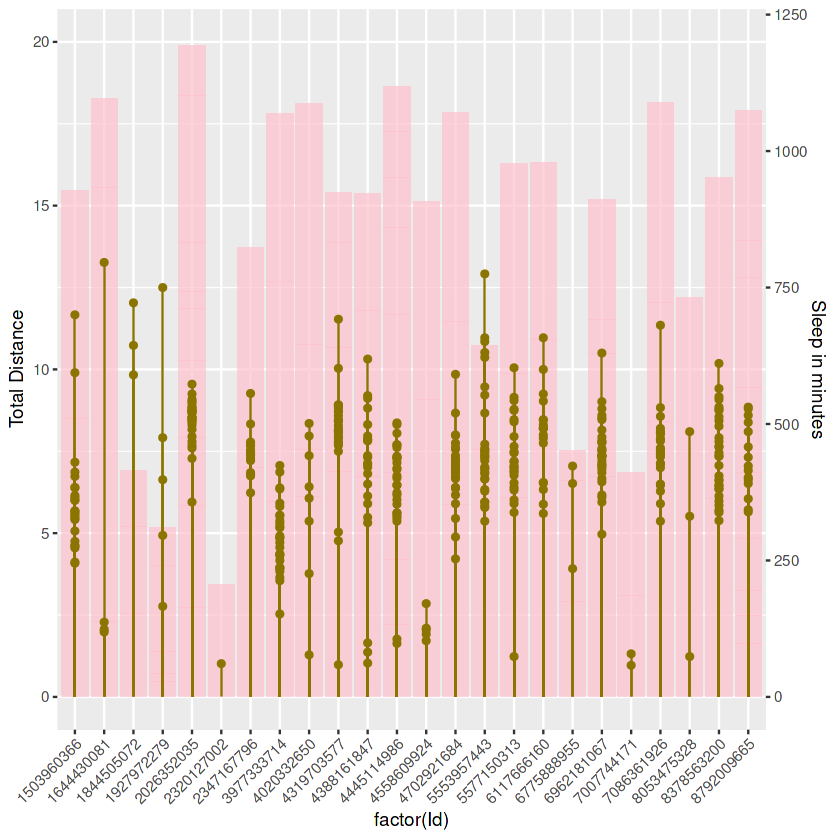

In [47]:
## checking whether their distance has impact on sleep.

ggplot(Avrg_sleep) +
  geom_bar(aes(x = factor(Id), y =Average_distance), stat = "identity", fill = 'pink', alpha = 0.7) +
  geom_point(aes(x = factor(Id), y = Average_sleep/60), color = 'gold4') +
  geom_segment(aes(x = factor(Id), xend = factor(Id), y = 0, yend = Average_sleep/60), color = 'gold4' ,group = 1)+ scale_y_continuous(limits=c(0,20), name = "Total Distance", 
    sec.axis = sec_axis(~.*60, name = "Sleep in minutes"))+ theme(axis.text.x = element_text(angle = 45, hjust = 1))
  labs(
    title = "Average distance vs average sleep",
    x = "Users"
  )

By the above graph we see very few relation that Average distance
covered by user doesn’t make much difference in a better sleep.Users
have more time in bed on weekends. Their average sleep is higher on
Friday and Sundays.Only few users have a better sleep quality and they
spend 7 to 9 hr of sleep. Not everyone has better sleep quality.

**5.6 Analyzing Users Weight**

In [48]:
weight_data$Average_weight <- round(weight_data$Average_weight)

glimpse(weight_data)

Rows: 67
Columns: 4
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <date> 2016-05-02, 2016-05-03, 2016-04-13, 2016-04-21, 2016-0…
$ Average_weight <dbl> 53, 53, 134, 57, 57, 72, 72, 70, 70, 70, 69, 69, 91, 62…
$ Average_Steps  <dbl> 14727, 15103, 356, 8859, 7566, 29, 10429, 8940, 8095, 3…


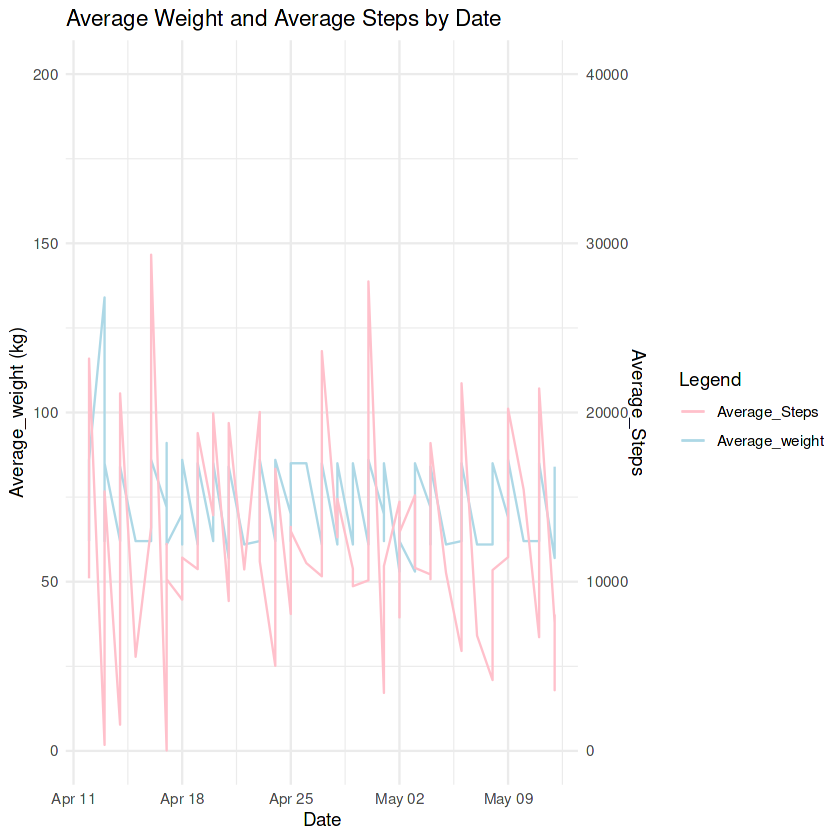

In [49]:
ggplot(weight_data, aes(x = Date)) +
  geom_line(aes(y = Average_weight, color = "Average_weight")) +
  geom_line(aes(y = Average_Steps / 200, color = "Average_Steps")) +  
  
  # Scale steps for better visualization
  scale_y_continuous( limit= c(0,200) ,name = "Average_weight (kg)",
    sec.axis = sec_axis(~ . * 200, name = "Average_Steps")
  ) +
  labs(
    title = "Average Weight and Average Steps by Date",
    x = "Date",
    color = "Legend"
  ) +
  scale_color_manual(values = c("Average_weight" = "lightblue", "Average_Steps" = "pink")) +
  theme_minimal()

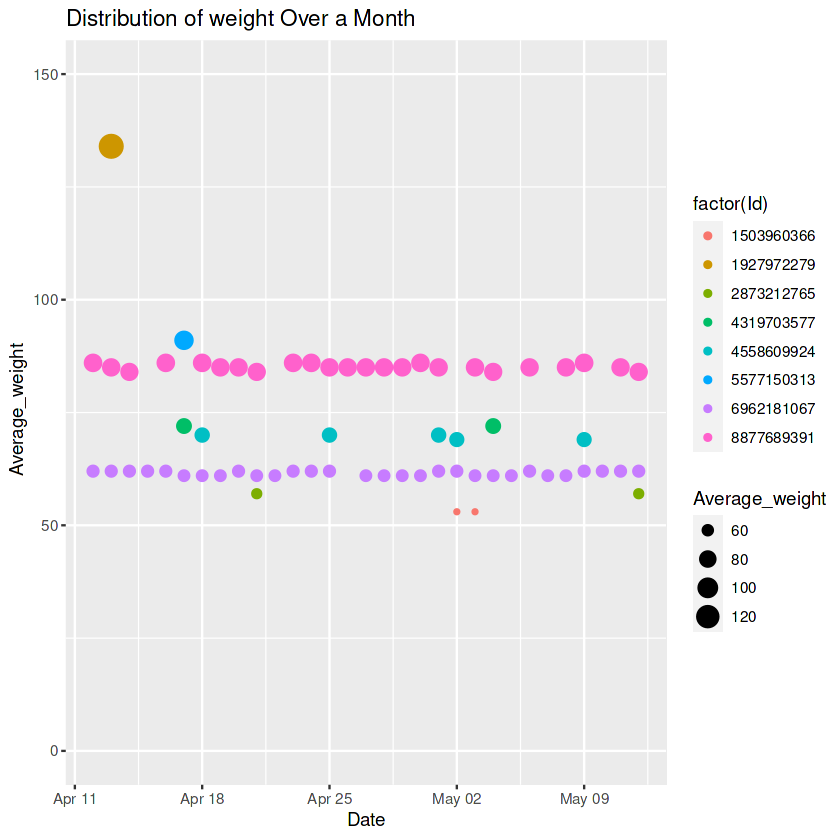

In [50]:
##Distribution of weight on various Date

ggplot(weight_data,aes(x = Date,y= Average_weight ,size =Average_weight, color = factor(Id),alpha(0.07)))+geom_point()+
  scale_y_continuous(limits = c(0 ,150), name = " Average_weight")+
  labs(
    title = "Distribution of weight Over a Month",
    x = "Date"
  )

In [51]:
user_Weight<-final_df %>% 
  select(Id,Date,VeryActiveMinutes,WeightKg) %>% 
  group_by(Id,Date) %>% 
  drop_na() %>% 
  ungroup()
glimpse(user_Weight)

Rows: 67
Columns: 4
$ Id                <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873…
$ Date              <date> 2016-05-02, 2016-05-03, 2016-04-13, 2016-04-21, 201…
$ VeryActiveMinutes <int> 41, 50, 0, 2, 0, 0, 8, 14, 18, 0, 0, 6, 200, 50, 8, …
$ WeightKg          <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.…


Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


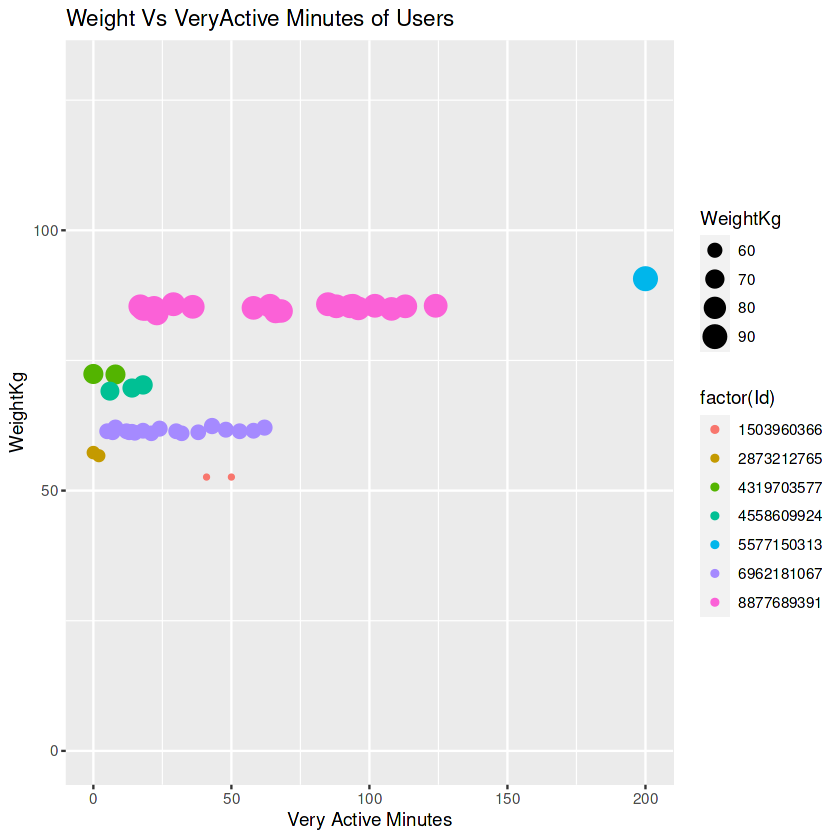

In [52]:
ggplot(data = user_Weight,aes(x = VeryActiveMinutes,y= WeightKg , color = factor(Id),size = WeightKg))+geom_point(stat = "summary", fun = "sum") +
  scale_y_continuous(limits = c(0,130), name ="WeightKg")+
  labs(
    title = "Weight Vs VeryActive Minutes of Users",
    x = "Very Active Minutes"
  )

In [53]:
mean(weight_data$Average_weight)
mean(weight_data$Average_Steps)

[1] 72.02985

[1] 12102.15

By visualizing the above plots we see that most of the users have
average **20 mins of very active minutes** and the more obese users
maintain more active minutes to reduce their weight.And If we see the
data of weight log throughout the month the users maintain constant
weight and their isn't much improvement.

The Average step taken by the users is **12102**.The average weight is
**72**.

# **Act**

Based on the analysis, we have identified several key trends and
insights that can be leveraged to enhance marketing strategies:

## **Key Insights**

1.  **Calories Burned and Steps Taken**:

    -   **Insight**: There is a statistically significant relationship
        between the number of steps taken and calories burned.

    -   **Application**: Highlight this relationship in marketing
        campaigns to emphasize the importance of physical activity for
        effective calorie burning.

2.  **Weekly Distance Patterns**:

    -   **Insight**: Users tend to cover more distance on Saturdays
        compared to other days of the week.

    -   **Application**: Promote weekend challenges or special Saturday
        fitness events to capitalize on higher activity levels.

3.  **Daily Activity Patterns**:

    -   **Insight**: Users are more active in the first half of the day
        (6 AM to 1 PM) and show a decrease in activity and calories
        burned in the later part of the day.

    -   **Application**: Schedule motivational messages and fitness
        reminders for the morning hours to encourage users to maintain
        their activity levels throughout the day.

4.  **Sleep Patterns**:

    -   **Insight**: Users spend more time in bed on weekends, with
        average sleep durations higher on Fridays and Sundays. However,
        not all users have good sleep quality.

    -   **Application**: Introduce educational content about the
        benefits of good sleep and how to achieve it, and promote sleep
        tracking features of the bellabeat device.

5.  **Active Minutes and Weight**:

    -   **Insight**: Most users have an average of 20 minutes of very
        active minutes daily. More obese users tend to maintain more
        active minutes to manage their weight.

    -   **Application**: Create targeted fitness programs that encourage
        short bursts of high-intensity activity, and share success
        stories of users who have effectively managed their weight
        through consistent activity.

6.  **Weight Management**:

    -   **Insight**: The data shows that users maintain a constant
        weight with little improvement over time.

    -   **Application**: Offer personalized weight management plans and
        tools to help users achieve their weight goals more effectively.

7.  **Average Steps and Weight**:

    -   **Insight**: The average steps taken by users are 12,102, and
        the average weight is 72 kg.

    -   **Application**: Use these averages as benchmarks in marketing
        materials, encouraging new users to join the community and reach
        these fitness milestones.

## **Marketing Strategy Recommendations**

1.  **Promote Activity Challenges**:

    -   Introduce weekly or monthly step challenges with rewards for
        high performers, focusing on increasing user engagement on
        Saturdays.

2.  **Morning Motivation Campaigns**:

    -   Run campaigns that provide motivational content and fitness tips
        during the morning hours to leverage the users' higher activity
        levels in the first half of the day.

3.  **Sleep Health Education**:

    -   Launch educational campaigns about the importance of good sleep
        and how Fitbit’s sleep tracking features can help improve sleep
        quality.

4.  **Personalized Fitness Plans**:

    -   Develop and market personalized fitness and weight management
        plans based on users' activity and weight data, emphasizing
        achievable daily goals like the 20 minutes of active minutes.

5.  **Success Stories and Testimonials**:

    -   Share success stories and testimonials from users who have seen
        significant improvements in their fitness and health through
        consistent use of bellabeat devices.

6.  **Weekend Wellness Programs**:

    -   Create special wellness programs for weekends, encouraging users
        to stay active and make use of their extra time in bed for
        better recovery and relaxation.

By aligning marketing strategies with these insights, bellabeat can
enhance user engagement, promote healthy habits, and ultimately drive
product adoption and satisfaction.

<center><font size="3"> **Thank You**</font></center>
